# Problem Set 1 - Neural network implementation

## Deep Learning E1394 (2025), Dr. Lynn Kaack
### PS1 Group F members and matriculation numbers:
- Aditi Joshi 243311
- Laia Domenech Burin 241597
- Lonny Chen 216697
- Franco Bastida 235549

As described in section "2 Neural network implementation" of assignment 1, the goal is to build a shallow neural network from scratch using different approaches. To validate that your code is working and that the network is actually learning something, please use the following MNIST classification task. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn import model_selection
import sklearn.datasets as sk_datasets
import torchvision.datasets as torch_datasets
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

from scratch.network import Network
from scratch.res_network import ResNetwork
from pytorch.network import TorchNetwork
from scratch.utils import *

# ADD: import for visualizations
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

## A) Neural Network Classifier from Scratch

### Data

In [3]:
# Download MNIST dataset
x, y_cat = sk_datasets.fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y_cat = y_cat.astype(int)
# One-hot encode y
y = np.zeros((len(y_cat), 10))
for i, val in enumerate(y_cat):
    y[i, val] = 1

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)


### ML Model & Training

In [41]:
fnn = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=100) #default epochs=50
plot_df = fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False) #save scores to DataFrame for plotting

Epoch: 1, Training Time: 0.21s, Training Accuracy: 23.62%, Validation Accuracy: 22.00%
Epoch: 2, Training Time: 0.46s, Training Accuracy: 28.75%, Validation Accuracy: 29.00%
Epoch: 3, Training Time: 0.72s, Training Accuracy: 36.00%, Validation Accuracy: 33.50%
Epoch: 4, Training Time: 0.92s, Training Accuracy: 45.25%, Validation Accuracy: 39.50%
Epoch: 5, Training Time: 1.16s, Training Accuracy: 54.00%, Validation Accuracy: 49.00%
Epoch: 6, Training Time: 1.41s, Training Accuracy: 60.00%, Validation Accuracy: 56.00%
Epoch: 7, Training Time: 1.66s, Training Accuracy: 65.75%, Validation Accuracy: 61.00%
Epoch: 8, Training Time: 1.88s, Training Accuracy: 69.12%, Validation Accuracy: 65.50%
Epoch: 9, Training Time: 2.11s, Training Accuracy: 70.75%, Validation Accuracy: 67.00%
Epoch: 10, Training Time: 2.31s, Training Accuracy: 72.25%, Validation Accuracy: 68.00%
Epoch: 11, Training Time: 2.51s, Training Accuracy: 73.62%, Validation Accuracy: 70.50%
Epoch: 12, Training Time: 2.76s, Training

### Test cosine annealing scheduler

In [42]:
# Need to create a second object, otherwise weights are already trained!
cosine_fnn = Network(sizes=[784, 128, 64, 10], learning_rate=0.5, epochs=100) #default epochs=50
cosine_df = cosine_fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)

Epoch: 1, Training Time: 0.24s, Training Accuracy: 39.00%, Validation Accuracy: 37.50%
Epoch: 2, Training Time: 0.44s, Training Accuracy: 67.88%, Validation Accuracy: 63.00%
Epoch: 3, Training Time: 0.70s, Training Accuracy: 75.62%, Validation Accuracy: 70.50%
Epoch: 4, Training Time: 0.91s, Training Accuracy: 79.00%, Validation Accuracy: 74.00%
Epoch: 5, Training Time: 1.17s, Training Accuracy: 81.88%, Validation Accuracy: 77.00%
Epoch: 6, Training Time: 1.38s, Training Accuracy: 83.75%, Validation Accuracy: 76.00%
Epoch: 7, Training Time: 1.59s, Training Accuracy: 85.50%, Validation Accuracy: 77.00%
Epoch: 8, Training Time: 1.79s, Training Accuracy: 87.12%, Validation Accuracy: 76.00%
Epoch: 9, Training Time: 2.01s, Training Accuracy: 88.50%, Validation Accuracy: 77.00%
Epoch: 10, Training Time: 2.24s, Training Accuracy: 90.00%, Validation Accuracy: 76.50%
Epoch: 11, Training Time: 2.49s, Training Accuracy: 90.88%, Validation Accuracy: 76.00%
Epoch: 12, Training Time: 2.74s, Training

### Test residual neural network

In [43]:
res_nn = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=1, epochs=100)
res_df = res_nn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.23s, Training Accuracy: 9.75%, Validation Accuracy: 9.50%
Epoch: 2, Training Time: 0.50s, Training Accuracy: 9.62%, Validation Accuracy: 11.00%
Epoch: 3, Training Time: 0.72s, Training Accuracy: 24.62%, Validation Accuracy: 21.50%
Epoch: 4, Training Time: 0.98s, Training Accuracy: 49.25%, Validation Accuracy: 47.00%
Epoch: 5, Training Time: 1.24s, Training Accuracy: 38.00%, Validation Accuracy: 36.50%
Epoch: 6, Training Time: 1.51s, Training Accuracy: 48.25%, Validation Accuracy: 39.50%
Epoch: 7, Training Time: 1.72s, Training Accuracy: 68.12%, Validation Accuracy: 66.00%
Epoch: 8, Training Time: 1.99s, Training Accuracy: 53.25%, Validation Accuracy: 48.50%
Epoch: 9, Training Time: 2.25s, Training Accuracy: 59.13%, Validation Accuracy: 55.00%
Epoch: 10, Training Time: 2.47s, Training Accuracy: 62.75%, Validation Accuracy: 56.00%
Epoch: 11, Training Time: 2.74s, Training Accuracy: 63.88%, Validation Accuracy: 60.00%
Epoch: 12, Training Time: 2.96s, Training Ac

## B) Neural Network Classifier using Torch

### Data

In [44]:
# Define data preprocessing steps
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = torch_datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = torch_datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


### ML Model & Training

In [45]:
torch_nn = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=100, random_state=GLOBAL_RANDOM_STATE)
torch_df = torch_nn.fit(train_loader, val_loader)

Epoch: 1, Training Time: 0.72s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 2, Training Time: 1.37s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 3, Training Time: 2.01s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 4, Training Time: 2.65s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 5, Training Time: 3.30s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 6, Training Time: 3.94s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 7, Training Time: 4.65s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 8, Training Time: 5.34s, Learning Rate: 0.1, Training Accuracy: 12.40%, Validation Accuracy: 10.60%
Epoch: 9, Training Time: 5.98s, Learning Rate: 0.1, Training Accuracy: 28.80%, Validation Accuracy: 25.00%
Epoch: 10, Training Time: 6.63s, Learning Ra

## C) Visualize accuracy & hyperparameter tuning

Here, you should compare the accuracy of all trained models. Optionally, you can also show the results of hyperparameter tuning and comment which hyperparameters work best for this task.

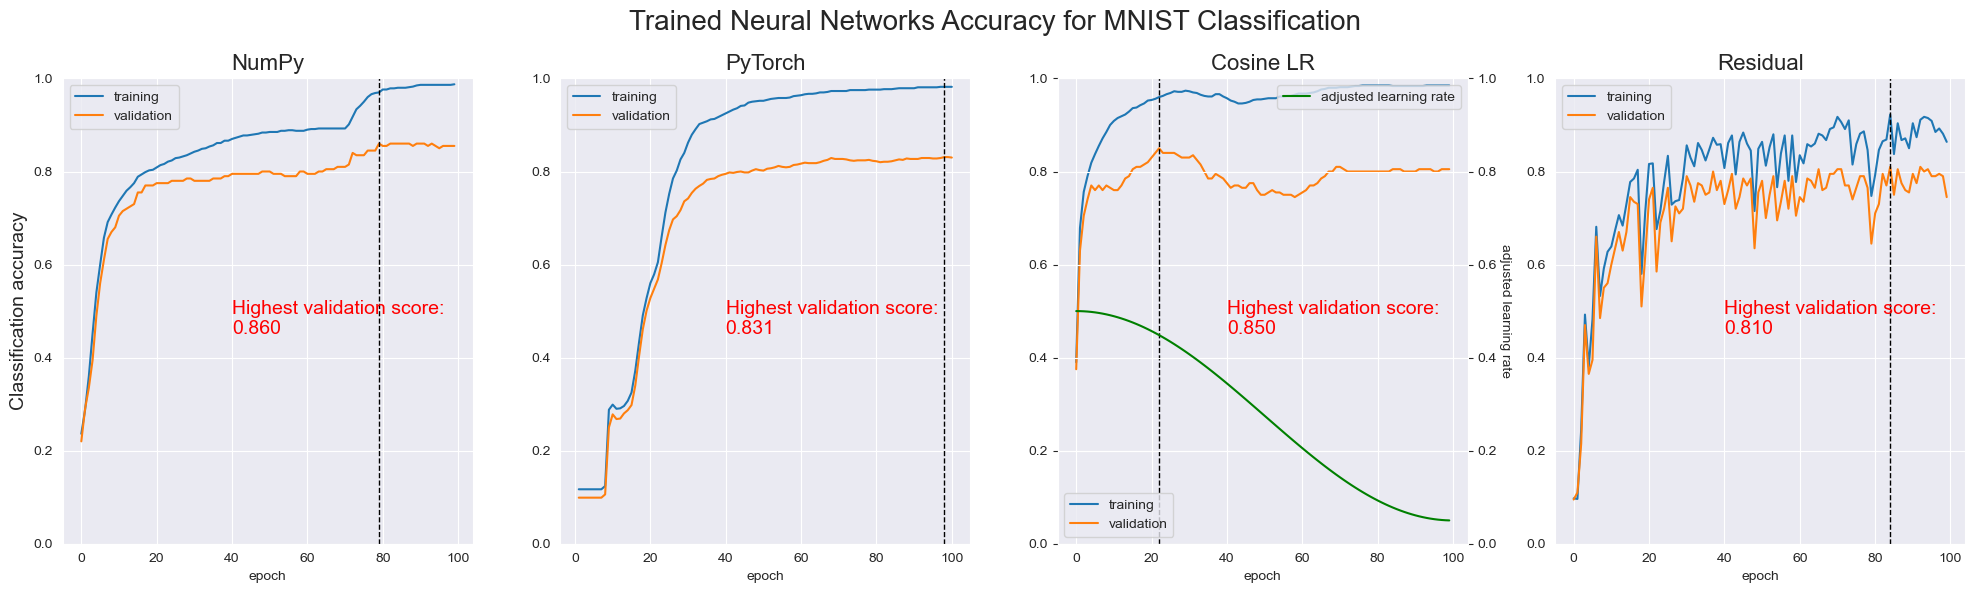

In [46]:
# Use subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
iters = list(range(0,4))
dfs = [plot_df, torch_df, cosine_df, res_df]
subtitles = ['NumPy', 'PyTorch', 'Cosine LR', 'Residual']

for i, df, st in zip(iters, dfs, subtitles):
    sns.lineplot(data=df, x='epoch', y='training', label='training', ax=axes[i])
    sns.lineplot(data=df, x='epoch', y='validation', label='validation', ax=axes[i])
    axes[i].set_title(st, fontsize=16);
    axes[i].set_ylim(0, 1.0)
    #left-side y-label only
    if i == 0:
        axes[i].set_ylabel('Classification accuracy', fontsize=14)
    else:
        axes[i].set_ylabel('')
    #best validation score line
    linex = df.loc[df['validation'].idxmax(), 'epoch']
    axes[i].vlines(x=linex, ymin=0, ymax=1, color='black', linestyle="--", linewidth=1)
    #cosine adaptive learning rate curve
    if i == 2: 
        axes_twin = axes[i].twinx()
        sns.lineplot(data=df, x='epoch', y='learning_rate', label='adjusted learning rate', color='green', ax=axes_twin)
        axes_twin.set_ylabel('adjusted learning rate', rotation=270, labelpad=10)
        axes_twin.set_ylim(0, 1)  
    #print highest validation score
    axes[i].text(40, 0.45, f'Highest validation score:\n{df['validation'].max():.3f}', color='red', fontsize=14)

fig.suptitle('Trained Neural Networks Accuracy for MNIST Classification', fontsize=20);
plt.tight_layout()
plt.show()

### Hyperparameter Tuning
(5 pt) Optional: try different hyperparameters and evaluate the trained networks. Briefly comment your results.
#### NumPy networking tuning

In [13]:
search = gen_random_search((64,512), (1,4), (0.05,0.2), 10)
tune = []
for s in search:
    print(f'Running epochs with sizes {s[0]} and learning rate {s[1]}')
    #Instantiate and fit model
    fnn = Network(sizes=s[0], learning_rate=s[1], epochs=50)
    fit_df = fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False, print_bool=False)
    tune.append((s[0][1], s[0][2], s[1], fit_df['validation'].idxmax()+1, fit_df['validation'].max()))

# Get best parameters
tune_numpy_df = pd.DataFrame(tune, columns = ['h1_size', 'h2_size', 'lr', 'epoch_max', 'validation_max'])
best_numpy = tune_numpy_df.loc[tune_numpy_df['validation_max'].idxmax()]
h1, h2, lr = int(best_numpy['h1_size']), int(best_numpy['h2_size']), best_numpy['lr']
sizes = [784, h1, h2, 10]
print(f'BEST parameters are sizes {sizes}, lr {lr} -> validation score {tune_numpy_df['validation_max'].max()}')

# Re-run to get plotting data
fnn = Network(sizes=sizes, learning_rate=lr, epochs=50)
plot_df = fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False, print_bool=False)

Running epochs with sizes [784, 65, 18, 10] and learning rate 0.06
Running epochs with sizes [784, 318, 106, 10] and learning rate 0.19
Running epochs with sizes [784, 139, 46, 10] and learning rate 0.09
Running epochs with sizes [784, 481, 339, 10] and learning rate 0.07
Running epochs with sizes [784, 77, 25, 10] and learning rate 0.14
Running epochs with sizes [784, 343, 174, 10] and learning rate 0.18
Running epochs with sizes [784, 311, 85, 10] and learning rate 0.18
Running epochs with sizes [784, 361, 279, 10] and learning rate 0.06
Running epochs with sizes [784, 66, 17, 10] and learning rate 0.09
Running epochs with sizes [784, 490, 365, 10] and learning rate 0.19
BEST parameters are sizes [784, 481, 339, 10], lr 0.07 -> validation score 0.885


#### PyTorch networking tuning

In [18]:
search = gen_random_search((64,512), (1,4), (0.05,0.2), 10)
tune = []
for s in search:
    print(f'Running epochs with sizes {s[0]} and learning rate {s[1]}')
    #Instantiate and fit model
    torch_nn = TorchNetwork(sizes=s[0], learning_rate=s[1], epochs=50, random_state=GLOBAL_RANDOM_STATE)
    fit_df = torch_nn.fit(train_loader, val_loader, print_bool=False)
    tune.append((s[0][1], s[0][2], s[1], fit_df['validation'].idxmax()+1, fit_df['validation'].max()))
    
# Get best parameters
tune_torch_df = pd.DataFrame(tune, columns = ['h1_size', 'h2_size', 'lr', 'epoch_max', 'validation_max'])
best_torch = tune_torch_df.loc[tune_torch_df['validation_max'].idxmax()]
h1, h2, lr = int(best_torch['h1_size']), int(best_torch['h2_size']), best_torch['lr']
sizes = [784, h1, h2, 10]
print(f'BEST parameters are sizes {sizes}, lr {lr} -> validation score {tune_torch_df['validation_max'].max()}')

# Re-run to get plotting data
torch_nn = TorchNetwork(sizes=sizes, learning_rate=lr, epochs=50, random_state=GLOBAL_RANDOM_STATE)
torch_df = torch_nn.fit(train_loader, val_loader, print_bool=False)

Running epochs with sizes [784, 212, 103, 10] and learning rate 0.16
Running epochs with sizes [784, 392, 367, 10] and learning rate 0.17
Running epochs with sizes [784, 384, 113, 10] and learning rate 0.12
Running epochs with sizes [784, 338, 258, 10] and learning rate 0.12
Running epochs with sizes [784, 91, 26, 10] and learning rate 0.18
Running epochs with sizes [784, 100, 27, 10] and learning rate 0.19
Running epochs with sizes [784, 324, 114, 10] and learning rate 0.16
Running epochs with sizes [784, 285, 212, 10] and learning rate 0.11
Running epochs with sizes [784, 226, 56, 10] and learning rate 0.15
Running epochs with sizes [784, 356, 284, 10] and learning rate 0.07
BEST parameters are sizes [784, 100, 27, 10], lr 0.19 -> validation score 0.8330000042915344


#### Cosine network tuning

In [19]:
search = gen_random_search((64,512), (1,4), (0.1,0.5), 10)
tune = []
for s in search:
    print(f'Running epochs with sizes {s[0]} and learning rate {s[1]}')
    #Instantiate and fit model
    cosine_fnn = Network(sizes=s[0], learning_rate=s[1], epochs=50)
    fit_df = cosine_fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True, print_bool=False)
    tune.append((s[0][1], s[0][2], s[1], fit_df['validation'].idxmax()+1, fit_df['validation'].max()))

# Get best parameters
tune_cosine_df = pd.DataFrame(tune, columns = ['h1_size', 'h2_size', 'lr', 'epoch_max', 'validation_max'])
best_cosine = tune_cosine_df.loc[tune_cosine_df['validation_max'].idxmax()]
h1, h2, lr = int(best_cosine['h1_size']), int(best_cosine['h2_size']), best_cosine['lr']
sizes = [784, h1, h2, 10]
print(f'BEST parameters are sizes {sizes}, lr {lr} -> validation score {tune_cosine_df['validation_max'].max()}')

# Re-run to get plotting data
cosine_fnn = Network(sizes=sizes, learning_rate=lr, epochs=50)
cosine_df = cosine_fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True, print_bool=False)

Running epochs with sizes [784, 402, 127, 10] and learning rate 0.13
Running epochs with sizes [784, 67, 35, 10] and learning rate 0.35
Running epochs with sizes [784, 466, 190, 10] and learning rate 0.44
Running epochs with sizes [784, 69, 20, 10] and learning rate 0.38
Running epochs with sizes [784, 461, 115, 10] and learning rate 0.27
Running epochs with sizes [784, 353, 329, 10] and learning rate 0.42
Running epochs with sizes [784, 330, 148, 10] and learning rate 0.17
Running epochs with sizes [784, 321, 136, 10] and learning rate 0.29
Running epochs with sizes [784, 399, 226, 10] and learning rate 0.39
Running epochs with sizes [784, 179, 58, 10] and learning rate 0.49
BEST parameters are sizes [784, 353, 329, 10], lr 0.42 -> validation score 0.895


#### Residual network tuning

In [38]:
search = gen_random_search((64,512), (1,4), (0.1,1), 10)
tune = []
for s in search:
    s2 = [s[0][0], s[0][2], s[0][2], s[0][3]] #hack!: resnet hidden layers need same size
    print(f'Running epochs with sizes {s2} and learning rate {s[1]}')
    #Instantiate and fit model
    res_nn = ResNetwork(sizes=s2, learning_rate=s[1], epochs=50) #hardcode to 1 else error!
    fit_df = res_nn.fit(x_train, y_train, x_val, y_val, print_bool=False)
    tune.append((s2[1], s2[2], s[1], fit_df['validation'].idxmax()+1, fit_df['validation'].max()))

# Get best parameters
tune_res_df = pd.DataFrame(tune, columns = ['h1_size', 'h2_size', 'lr', 'epoch_max', 'validation_max'])
best_res = tune_res_df.loc[tune_res_df['validation_max'].idxmax()]
h1, h2, lr = int(best_res['h1_size']), int(best_res['h2_size']), best_res['lr']
sizes = [784, h1, h2, 10]
print(f'BEST parameters are sizes {sizes}, lr {lr} -> validation score {tune_res_df['validation_max'].max()}')

# Re-run to get plotting data
res_nn = ResNetwork(sizes=sizes, learning_rate=lr, epochs=50)
res_df = res_nn.fit(x_train, y_train, x_val, y_val, print_bool=False)

Running epochs with sizes [784, 158, 158, 10] and learning rate 0.63
Running epochs with sizes [784, 100, 100, 10] and learning rate 0.37
Running epochs with sizes [784, 141, 141, 10] and learning rate 0.37
Running epochs with sizes [784, 67, 67, 10] and learning rate 0.3
Running epochs with sizes [784, 140, 140, 10] and learning rate 0.36
Running epochs with sizes [784, 124, 124, 10] and learning rate 0.21
Running epochs with sizes [784, 415, 415, 10] and learning rate 0.62
Running epochs with sizes [784, 30, 30, 10] and learning rate 0.5
Running epochs with sizes [784, 169, 169, 10] and learning rate 0.99
Running epochs with sizes [784, 398, 398, 10] and learning rate 0.53
BEST parameters are sizes [784, 124, 124, 10], lr 0.21 -> validation score 0.835


### Hyperparameters best results visualization

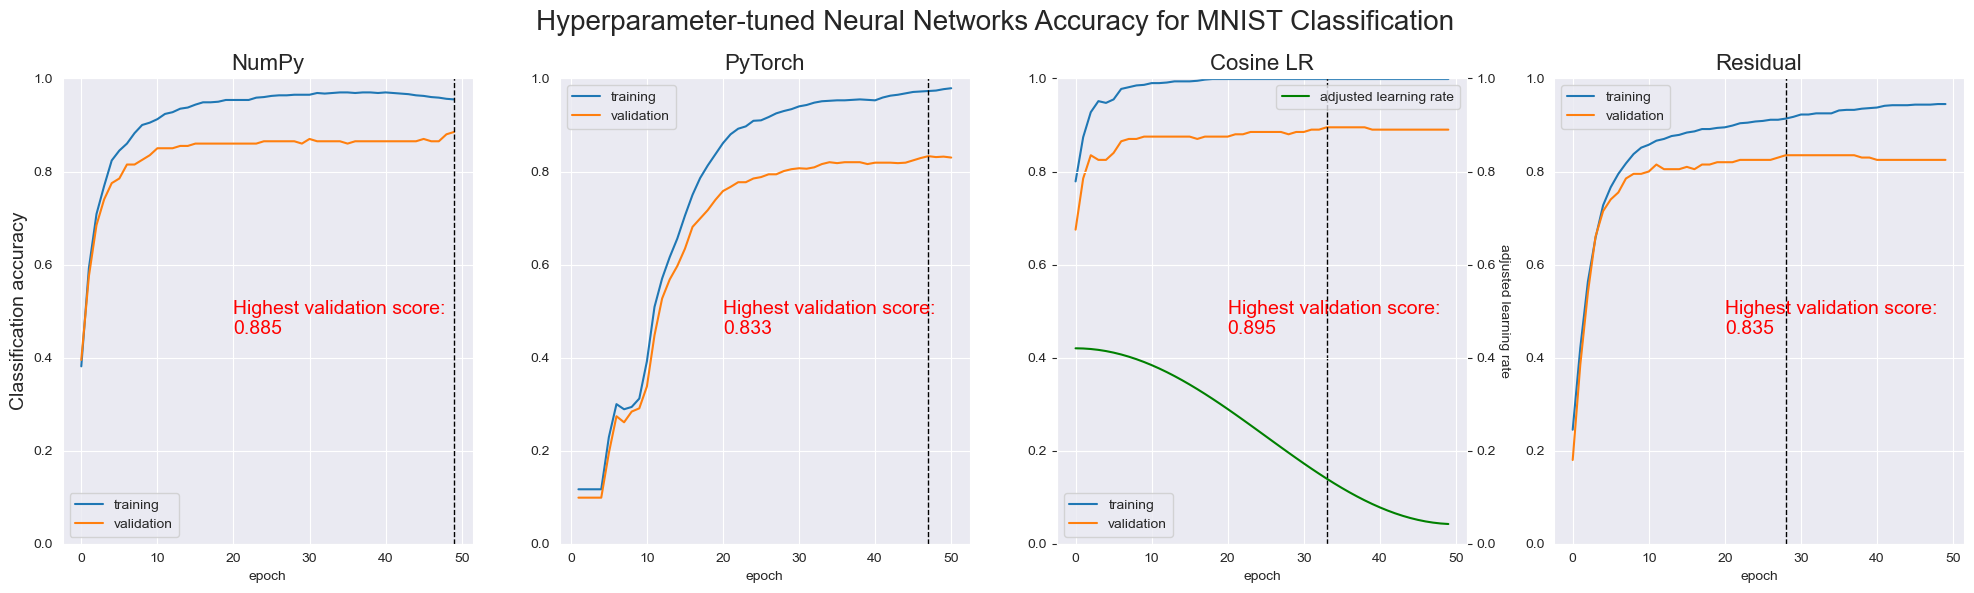

In [40]:
# Use subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
iters = list(range(0,4))
dfs = [plot_df, torch_df, cosine_df, res_df]
subtitles = ['NumPy', 'PyTorch', 'Cosine LR', 'Residual']

for i, df, st in zip(iters, dfs, subtitles):
    sns.lineplot(data=df, x='epoch', y='training', label='training', ax=axes[i])
    sns.lineplot(data=df, x='epoch', y='validation', label='validation', ax=axes[i])
    axes[i].set_title(st, fontsize=16);
    axes[i].set_ylim(0, 1.0)
    #left-side y-label only
    if i == 0:
        axes[i].set_ylabel('Classification accuracy', fontsize=14)
    else:
        axes[i].set_ylabel('')
    #best validation score line
    linex = df.loc[df['validation'].idxmax(), 'epoch']
    axes[i].vlines(x=linex, ymin=0, ymax=1, color='black', linestyle="--", linewidth=1)
    #cosine adaptive learning rate curve
    if i == 2:
        axes_twin = axes[i].twinx()
        sns.lineplot(data=df, x='epoch', y='learning_rate', label='adjusted learning rate', color='green', ax=axes_twin)
        axes_twin.set_ylabel('adjusted learning rate', rotation=270, labelpad=10)
        axes_twin.set_ylim(0, 1)  
    #print highest validation score
    axes[i].text(20, 0.45, f'Highest validation score:\n{df['validation'].max():.3f}', color='red', fontsize=14)

fig.suptitle('Hyperparameter-tuned Neural Networks Accuracy for MNIST Classification', fontsize=20);
plt.tight_layout()
plt.show()

### Hyperparameters best results discussion
**Pre-tuning settings**
- Hidden layer 1 size = 128
- Hidden layer 2 size = 64
- Learning rate = 0.1 (NumPy, PyTorch), 0.5 (Cosine), 1.0 (Residual)

**Discussion points**
- All four networks were able to achieve higher scores with the following values for the hidden layer sizes, and learning rate:
    - NumPy: [481, 339], 0.07
    - Cosine LR scheduler: [353, 329], 0.42
    - Residual network: [124, 124], 0.21
    - PyTorch: [100, 27], 0.19
- For NumPy and Cosine LR scheduler, perhaps the **significantly larger hidden layers** improve "capacity" to "learn" better
- For Residual network, the **lower learning rate** (vs. 1.0) allows a more stable journey towards minimizing loss
- For PyTorch, the difference is smaller and perhaps just due to randomization

## References
- Andreoni, R. (2022, September 21). *Building a deep neural network from scratch using Numpy.* Towards Data Science. https://towardsdatascience.com/building-a-deep-neural-network-from-scratch-using-numpy-4f28a1df157a/
- Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2023). *Dive into deep learning.* Cambridge University Press. https://d2l.ai/
- Implementation of neural network from scratch using NumPy. (2025, April 11). *GeeksforGeeks.* https://www.geeksforgeeks.org/numpy/implementation-of-neural-network-from-scratch-using-numpy/
### Generative AI Prompts
- "In backprop are the partial derivative calculatons always using matrix dot products?” prompt. *ChatGPT-5*, OpenAI, 2025, October 3, https://chatgpt.com
- "Why is it not a matrix multiplication for the neuron activation?” prompt. *ChatGPT-5*, OpenAI, 2025, October 3, https://chatgpt.com
- "Better way to do this?: dldw3 = dlda3.reshape(-1, 1) @ self.h2.reshape(1, -1)?” prompt. *ChatGPT-5*, OpenAI, 2025, October 3, https://chatgpt.com
- "What hyperparameters can I change for neural network?" prompt. *ChatGPT-5*, OpenAI, 2025, October 3, https://chatgpt.com